In [112]:
import cv2
import numpy as np

from cv2 import aruco
import matplotlib.pyplot as plt

%matplotlib inline

In [113]:
unit_size = 15 # change it so can be divide by (marker_size + marker_gap_size)

wid_num = 6 # marker number height
hei_num = 6 # marker umber width

marker_size = 12 # marker size, square
marker_gap_size = 3 # marker gap size
marker_unit_size = marker_size + marker_gap_size

multi_factor = 10

In [114]:
board_width =  multi_factor * int((unit_size / marker_unit_size) * (marker_unit_size * (wid_num - 1) + marker_size))
board_heigh = multi_factor * int((unit_size / marker_unit_size) * (marker_unit_size * (hei_num - 1) + marker_size))

In [115]:
board_heigh

870

In [116]:
teeth_start_idx = 200

aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_250)
aruco_dict.bytesList=aruco_dict.bytesList[teeth_start_idx:,:,:]
# aruco_dict.bytesList=aruco_dict.bytesList[100:,:,:]
board = aruco.GridBoard([wid_num,hei_num],marker_size, marker_gap_size,aruco_dict)
# board = aruco.GridBoard.Create(wid_num, hei_num, marker_size, marker_gap_size, aruco_dict)
imboard = board.generateImage([board_width, board_heigh])
# imboard = board.draw((board_width, board_heigh))

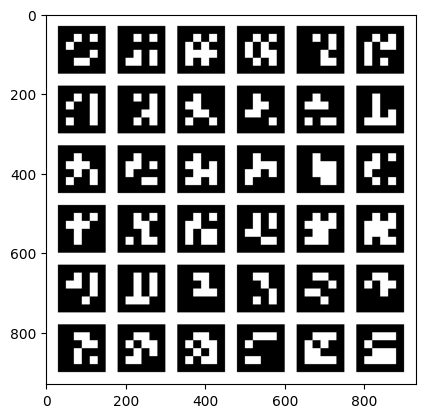

In [117]:

gap_len = multi_factor * int((unit_size / marker_unit_size) * marker_gap_size)
whiteslice = np.zeros((board_heigh, gap_len, 1), np.uint8)
whiteslice[:] = 255
whiteslice2 = np.zeros((gap_len, board_width + (2 * gap_len), 1), np.uint8)
whiteslice2[:] = 255

imboard2 = cv2.hconcat([whiteslice, imboard, whiteslice])
imboard2 = cv2.vconcat([whiteslice2, imboard2, whiteslice2])


plt.imshow(cv2.cvtColor(imboard2, cv2.COLOR_BGR2RGB))
plt.show()

In [118]:
imboard2.shape

(930, 930)

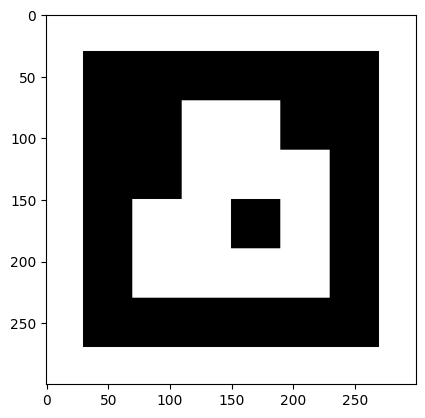

In [119]:
#big code 60
unit_size = 27 # change it so can be divide by (marker_size + marker_gap_size)

wid_num = 1 # marker number height
hei_num = 1 # marker umber width

marker_size = 24 # marker size, square
marker_gap_size = 3 # marker gap size
marker_unit_size = marker_size + marker_gap_size

multi_factor = 10

board_width =  multi_factor * int((unit_size / marker_unit_size) * (marker_unit_size * (wid_num - 1) + marker_size))
board_heigh = multi_factor * int((unit_size / marker_unit_size) * (marker_unit_size * (hei_num - 1) + marker_size))
start_idx = 60
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_100)
aruco_dict.bytesList=aruco_dict.bytesList[start_idx:,:,:]
# aruco_dict.bytesList=aruco_dict.bytesList[100:,:,:]
board = aruco.GridBoard([wid_num,hei_num],marker_size, marker_gap_size,aruco_dict)
# board = aruco.GridBoard.Create(wid_num, hei_num, marker_size, marker_gap_size, aruco_dict)
imboard = board.generateImage([board_width, board_heigh])
gap_len = multi_factor * int((unit_size / marker_unit_size) * marker_gap_size)
whiteslice = np.zeros((board_heigh, gap_len, 1), np.uint8)
whiteslice[:] = 255
whiteslice2 = np.zeros((gap_len, board_width + (2 * gap_len), 1), np.uint8)
whiteslice2[:] = 255

imboard3 = cv2.hconcat([whiteslice, imboard, whiteslice])
imboard3 = cv2.vconcat([whiteslice2, imboard3, whiteslice2])
plt.imshow(cv2.cvtColor(imboard3, cv2.COLOR_BGR2RGB))
plt.show()

In [120]:
imboard3.shape
imboard2.shape

(930, 930)

In [121]:
operation_board = np.zeros((1200, 1000), np.uint8)
operation_board[5:1195, 5:995] = 255
operation_board[35:965, 35:965] = imboard2
operation_board[350:650, 350:650] = 255
operation_board[350:650, 350:650] = imboard3

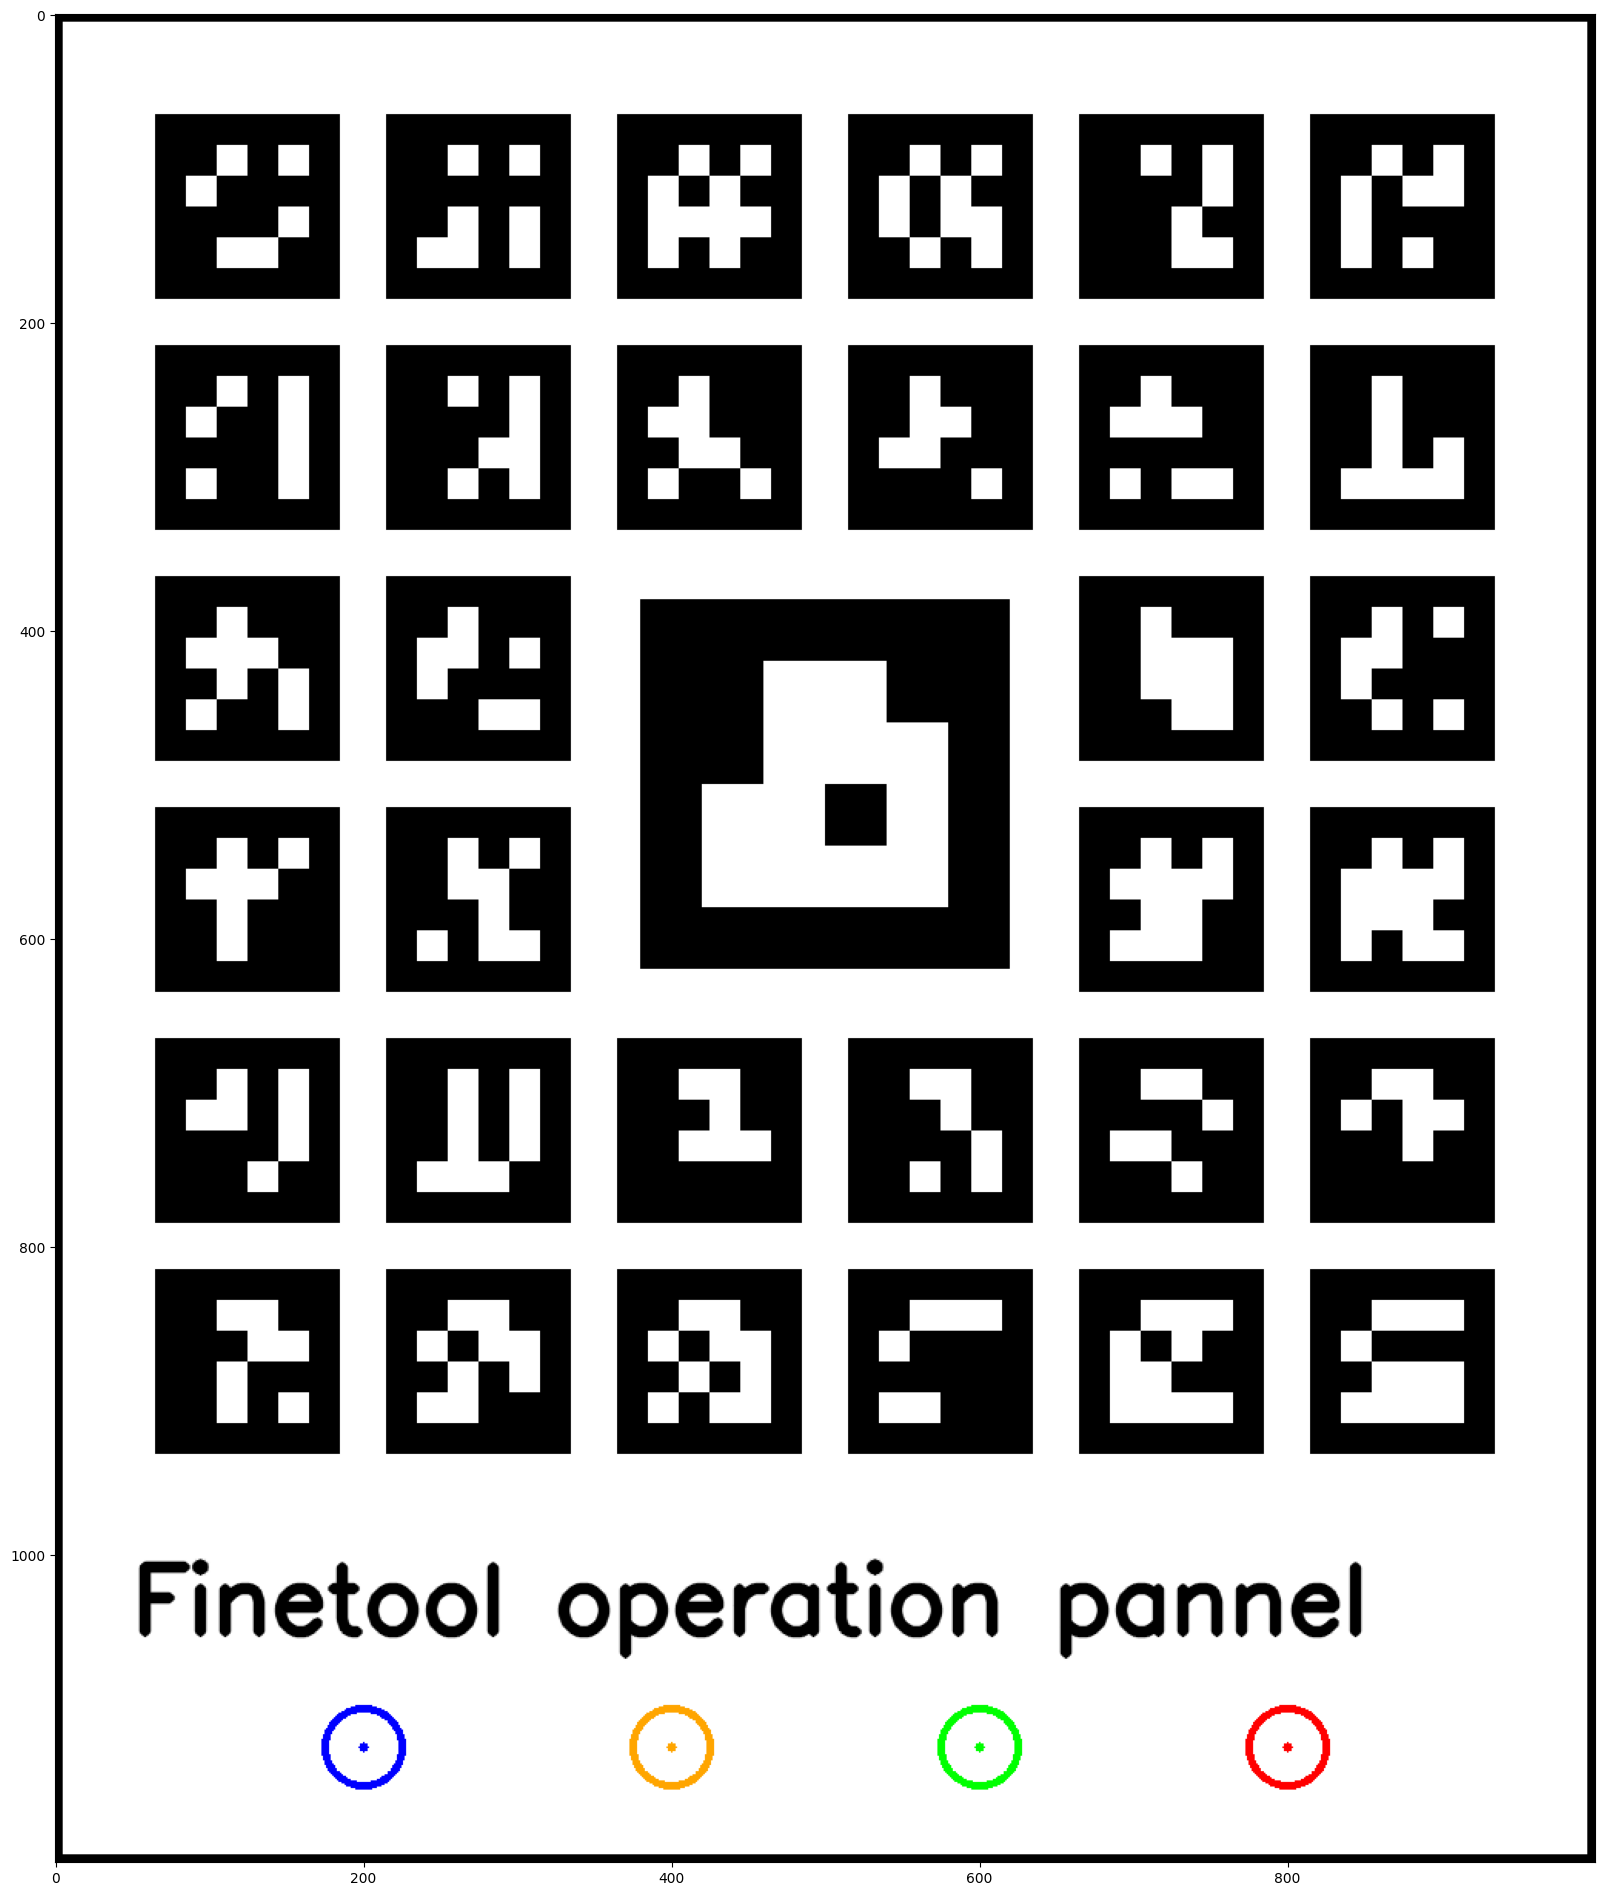

In [122]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(operation_board, 'Finetool operation pannel', (50,1050), font, 2, (0, 0, 0), 5, cv2.LINE_AA)

bgr_operation_board = cv2.cvtColor(operation_board, cv2.COLOR_GRAY2BGR)
color = [(255, 0, 0),(0, 165, 255),(0, 255, 0),(0, 0, 255)]
for i in range(4):
    cv2.circle(bgr_operation_board, (200*(i+1), 1125), 25, color[i], 3)
    cv2.circle(bgr_operation_board,(200*(i+1), 1125),3,color[i],-1)

plt.figure(figsize=(20,24))
plt.imshow(cv2.cvtColor(bgr_operation_board, cv2.COLOR_BGR2RGB))
plt.show()

In [123]:
A4_board = np.zeros((2970, 2100,3), np.uint8)
A4_board[5:2965, 5:2095] = (255,255,255)

# A4_board[200:1400, 200:1400] = teethboard
for i in range(2):
        A4_board[(40 + (i *1300)):(1240 + (i *1300)), (100):(100 + 1000)] = bgr_operation_board
        
cv2.imwrite("operation-a4.png", A4_board)

True